<a href="https://colab.research.google.com/github/fikaasn/EDA-with-Python-2-/blob/main/EDA_RiceAndPalmOilProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Read data
df_padi = pd.read_csv('/content/gdrive/MyDrive/Data Padi dan Sawit Prov Jabar/Padi.csv', delimiter=',')
df_sawit = pd.read_csv('/content/gdrive/MyDrive/Data Padi dan Sawit Prov Jabar/sawit.csv', delimiter=',')

# **1. Understanding The Data**

### == Missing and Duplicated Value Check and Handling Padi Table

In [4]:
df_padi.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,produksi_padi,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,559367.0,TON,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,767668.0,TON,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,882663.0,TON,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,584336.0,TON,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,917503.0,TON,2013


In [5]:
df_padi.tail()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,produksi_padi,satuan,tahun
265,266,32,JAWA BARAT,3275,KOTA BEKASI,1868.44,TON,2022
266,267,32,JAWA BARAT,3276,KOTA DEPOK,72.13,TON,2022
267,268,32,JAWA BARAT,3277,KOTA CIMAHI,338.03,TON,2022
268,269,32,JAWA BARAT,3278,KOTA TASIKMALAYA,54233.66,TON,2022
269,270,32,JAWA BARAT,3279,KOTA BANJAR,31271.18,TON,2022


In [6]:
#simple data checking
df_padi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   270 non-null    int64  
 1   kode_provinsi        270 non-null    int64  
 2   nama_provinsi        270 non-null    object 
 3   kode_kabupaten_kota  270 non-null    int64  
 4   nama_kabupaten_kota  270 non-null    object 
 5   produksi_padi        270 non-null    float64
 6   satuan               270 non-null    object 
 7   tahun                270 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.0+ KB


In [7]:
# check missing values
df_padi.isna().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
produksi_padi          0
satuan                 0
tahun                  0
dtype: int64

*In the data, there are 8 columns and 270 rows. There are no missing values.*

In [8]:
df_padi.nunique()

id                     270
kode_provinsi            1
nama_provinsi            1
kode_kabupaten_kota     27
nama_kabupaten_kota     27
produksi_padi          270
satuan                   1
tahun                   10
dtype: int64

In [9]:
df_padi['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [10]:
df_padi['tahun'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [11]:
# number of duplicated data
df_padi.duplicated().sum()


0

*There are no duplicated data*

### == Missing and Duplicated Value Check and Handling Sawit Table

In [12]:
df_sawit.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_produksi,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,43073,TON,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,45341,TON,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,8094,TON,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,TON,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,48069,TON,2016


In [13]:
df_sawit.tail()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_produksi,satuan,tahun
184,185,32,JAWA BARAT,3275,KOTA BEKASI,0,TON,2022
185,186,32,JAWA BARAT,3276,KOTA DEPOK,0,TON,2022
186,187,32,JAWA BARAT,3277,KOTA CIMAHI,0,TON,2022
187,188,32,JAWA BARAT,3278,KOTA TASIKMALAYA,0,TON,2022
188,189,32,JAWA BARAT,3279,KOTA BANJAR,0,TON,2022


In [14]:
#simple data checking
df_sawit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   189 non-null    int64 
 1   kode_provinsi        189 non-null    int64 
 2   nama_provinsi        189 non-null    object
 3   kode_kabupaten_kota  189 non-null    int64 
 4   nama_kabupaten_kota  189 non-null    object
 5   jumlah_produksi      189 non-null    int64 
 6   satuan               189 non-null    object
 7   tahun                189 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 11.9+ KB


In [15]:
# check missing values
df_sawit.isna().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_produksi        0
satuan                 0
tahun                  0
dtype: int64

*In the data, there are 8 columns and 189 rows. There are no missing values.*

In [16]:
df_sawit.nunique()

id                     189
kode_provinsi            1
nama_provinsi            1
kode_kabupaten_kota     27
nama_kabupaten_kota     27
jumlah_produksi         42
satuan                   1
tahun                    7
dtype: int64

In [17]:
df_sawit['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [18]:
df_sawit['tahun'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [19]:
# number of duplicated data
df_padi.duplicated().sum()

0

*There are no duplicated data*

# **2. Joining Padi Table and Sawit Table**

In [20]:
# joining table using inner join
# because want to retrieve the intersection of data with the same production year and code

df = pd.merge (df_padi, df_sawit,
               on = ['kode_kabupaten_kota','tahun'], how = 'inner')
df.head()

,id_x,kode_provinsi_x,nama_provinsi_x,kode_kabupaten_kota,nama_kabupaten_kota_x,produksi_padi,satuan_x,tahun,id_y,kode_provinsi_y,nama_provinsi_y,nama_kabupaten_kota_y,jumlah_produksi,satuan_y
0,82,32,JAWA BARAT,3201,KABUPATEN BOGOR,582917.0,TON,2016,1,32,JAWA BARAT,KABUPATEN BOGOR,43073,TON
1,83,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,956502.0,TON,2016,2,32,JAWA BARAT,KABUPATEN SUKABUMI,45341,TON
2,84,32,JAWA BARAT,3203,KABUPATEN CIANJUR,939731.0,TON,2016,3,32,JAWA BARAT,KABUPATEN CIANJUR,8094,TON
3,85,32,JAWA BARAT,3204,KABUPATEN BANDUNG,518331.0,TON,2016,4,32,JAWA BARAT,KABUPATEN BANDUNG,0,TON
4,86,32,JAWA BARAT,3205,KABUPATEN GARUT,962531.0,TON,2016,5,32,JAWA BARAT,KABUPATEN GARUT,48069,TON


In [21]:
# check all column names
df.isna().sum()

id_x                     0
kode_provinsi_x          0
nama_provinsi_x          0
kode_kabupaten_kota      0
nama_kabupaten_kota_x    0
produksi_padi            0
satuan_x                 0
tahun                    0
id_y                     0
kode_provinsi_y          0
nama_provinsi_y          0
nama_kabupaten_kota_y    0
jumlah_produksi          0
satuan_y                 0
dtype: int64

In [22]:
# delete unnecessary columns
df = df.drop(['id_x', 'kode_provinsi_x','nama_provinsi_x',
              'id_y','kode_provinsi_y','nama_provinsi_y',
              'nama_kabupaten_kota_y','satuan_y'],axis=1)
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota_x,produksi_padi,satuan_x,tahun,jumlah_produksi
0,3201,KABUPATEN BOGOR,582917.0,TON,2016,43073
1,3202,KABUPATEN SUKABUMI,956502.0,TON,2016,45341
2,3203,KABUPATEN CIANJUR,939731.0,TON,2016,8094
3,3204,KABUPATEN BANDUNG,518331.0,TON,2016,0
4,3205,KABUPATEN GARUT,962531.0,TON,2016,48069


In [23]:
# change column names and adjust the column
df.rename(columns={'nama_kabupaten_kota_x' : 'nama_kabupaten_kota',
                   'jumlah_produksi' : 'produksi_sawit',
                   'satuan_x' : 'satuan'}, inplace = True)
move = ['tahun', 'kode_kabupaten_kota', 'nama_kabupaten_kota',
        'produksi_padi', 'produksi_sawit', 'satuan']
df = df[move]
df.head()

,tahun,kode_kabupaten_kota,nama_kabupaten_kota,produksi_padi,produksi_sawit,satuan
0,2016,3201,KABUPATEN BOGOR,582917.0,43073,TON
1,2016,3202,KABUPATEN SUKABUMI,956502.0,45341,TON
2,2016,3203,KABUPATEN CIANJUR,939731.0,8094,TON
3,2016,3204,KABUPATEN BANDUNG,518331.0,0,TON
4,2016,3205,KABUPATEN GARUT,962531.0,48069,TON


# **3. Statistical Summaries of Columns**

In [29]:
# Grouping columns by data category
categoricals = ['nama_kabupaten_kota','satuan']
numericals = ['tahun','produksi_padi', 'produksi_sawit']

In [27]:
# numerical statistical summary
df[numericals].describe()

,tahun,produksi_padi,produksi_sawit
count,189.000000,1.890000e+02,189.000000
mean,2019.000000,4.200511e+05,6384.661376
std,2.005312,4.122788e+05,16271.652526
min,2016.000000,7.213000e+01,0.000000
25%,2017.000000,2.424600e+04,0.000000
50%,2019.000000,3.324620e+05,0.000000
75%,2021.000000,6.179410e+05,0.000000
max,2022.000000,1.795707e+06,72437.000000


*Findings* :

1. *Year :*
  - *The data ranges from the year 2016 to 2022 with a standard deviation of 2 years from the mean.*

2. *Rice Production :*
  - *A relatively large standard deviation compared to the mean and a wide range between the first quartile (25%) and the third quartile (75%) indicate significant variation in production among entries.*

3. *Palm Oil Production :*
  - *High standard deviation and the majority of values at the first quartile (25%), median (50%), and third quartile (75%) being 0 indicate that palm oil production has a very large variation, with at least 75% of the palm oil production data having a value of 0.*

In [30]:
# describe method on categorical data
df[categoricals].describe()

,nama_kabupaten_kota,satuan
count,189,189
unique,27,1
top,KABUPATEN BOGOR,TON
freq,7,189


*Findings* :

1. *The data includes 27 districts/cities based on the "nama_kabupaten_kota" column. "KABUPATEN BOGOR" appears most frequently.*

2. *All data in the "satuan" column is measured in tons. This data is consistent and does not vary.*



# **4. Univariate Analysis**

*Univariate analysis focuses on understanding and exploring a single variable at a time. Its goal is to comprehend the characteristics, distribution, and statistical properties of that particular variable.*



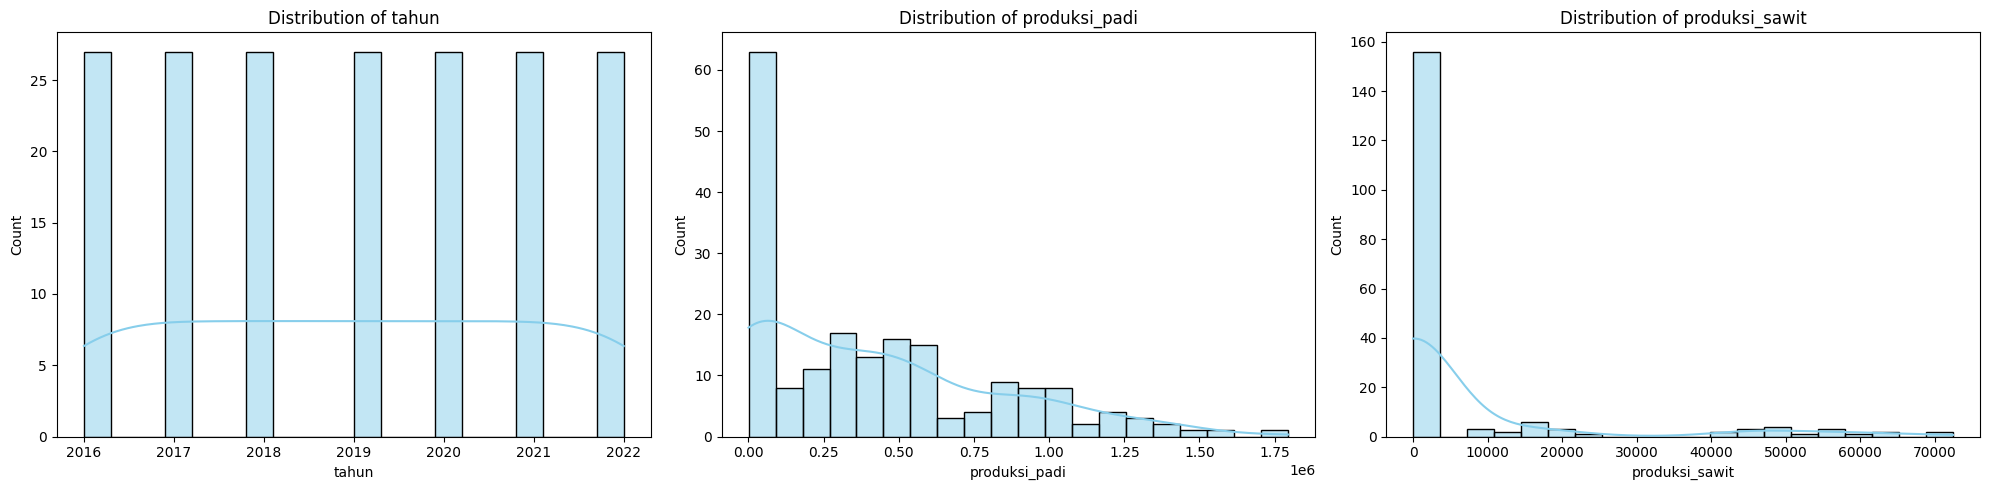

In [31]:
# Histogram with Kernel Density Plot
features = numericals
plt.figure(figsize=(20,5))
for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.histplot(df[features[i]], color='skyblue', bins=20, kde=True)
    # sns.histplot to create a histogram with a kernel density plot overlaid
    # kde=True is used to display the kernel density plot on top of the histogram
    plt.xlabel(features[i])
    plt.title(f'Distribution of {features[i]}')

plt.tight_layout()
plt.show()


*Analysis of the data distribution in the histogram with a kernel density plot provides insights :*
   - *The distribution of years has bars of almost the same length, and the kernel density plot does not show skewness or a tendency in a specific direction. This indicates that the year data has a fairly uniform distribution.*
   - *The distribution of rice production has a pattern similar to palm oil production, with a higher peak around the value of 0, indicating that most of the data has relatively low production.*


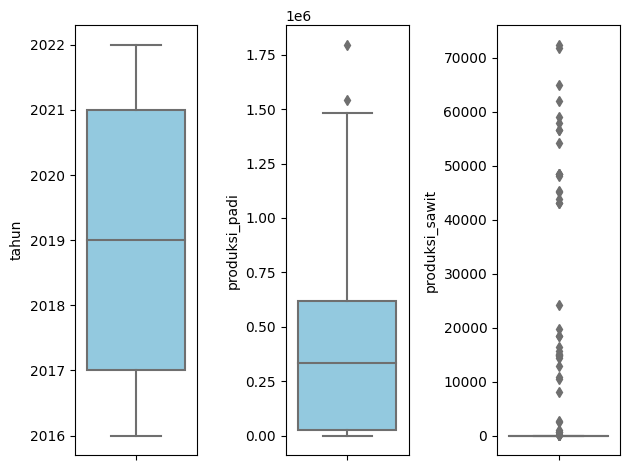

In [32]:
# Box Plot to detect outliers
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

*The description of the box plot indicates that :*

- *The distribution of years shows a balanced and consistent distribution. The box (interquartile range or IQR) is balanced, and there are few or no extreme values (outliers).*

- *The distribution of rice production has a wide range of values with a tendency for many low values. The box (IQR) is centered around the value of 0, indicating that most data clusters near the minimum value. The presence of points above the right whisker indicates the existence of very high extreme values (outliers).*

- *The distribution of palm oil production also has a wide range of values, with the majority of low values. A striking difference is the absence of a box (IQR) in the box plot, indicating that most data is concentrated at low values but not as centralized.*

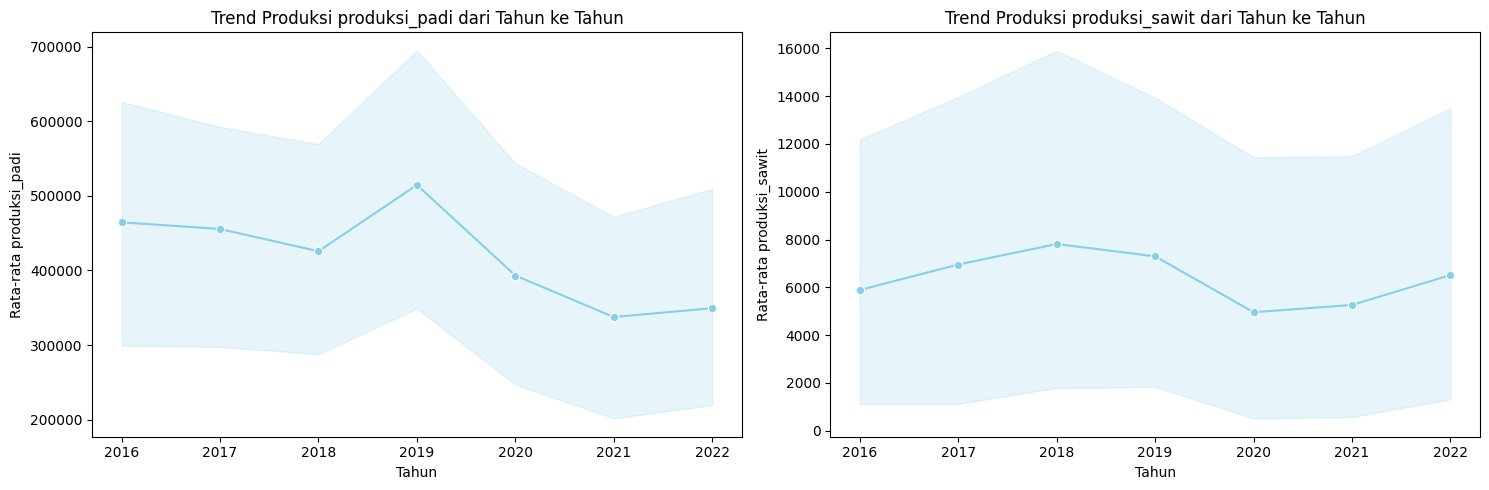

In [33]:
# Line plot to observe time trends
features = ['produksi_padi','produksi_sawit']
plt.figure(figsize=(15, 5))

for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.lineplot(x='tahun', y=features[i], data=df, marker='o', linestyle='-', color='skyblue')
    plt.title(f'Trend Produksi {features[i]} dari Tahun ke Tahun')
    plt.xlabel('Tahun')
    plt.ylabel(f'Rata-rata {features[i]}')
    plt.tight_layout()

plt.show()



 *The line plot is used to observe time trends, where the highest trend in rice production is in 2019 and decreases in the following years, while the highest trend in palm oil production is in 2018.*

# **5. Bivariate Analysis**

*Bivariate analysis involves understanding and examining the relationship between two variables simultaneously. Its goal is to determine whether there is a correlation or relationship between two variables and how changes in one variable can affect the other.*

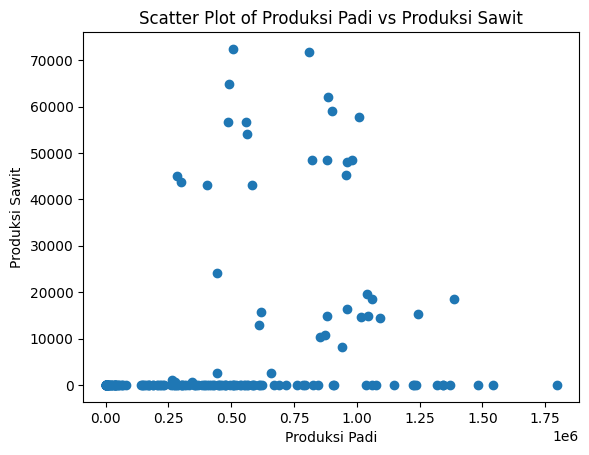

In [34]:
# Scatter plot to observe the relationship between
# rice production and oil palm production
plt.scatter(df['produksi_padi'], df['produksi_sawit'])
plt.title('Scatter Plot of Produksi Padi vs Produksi Sawit')
plt.xlabel('Produksi Padi')
plt.ylabel('Produksi Sawit')
plt.show()

- *The points are scattered randomly without a clear pattern, indicating that there is no systematic relationship between the amount of rice production and palm oil production. The amount of rice production does not directly predict or correlate with the amount of palm oil production, and vice versa.*

- *The points cluster like a horizontal line around the value of 0 on the y-axis, indicating that most of the palm oil production data has low values or is close to 0.*

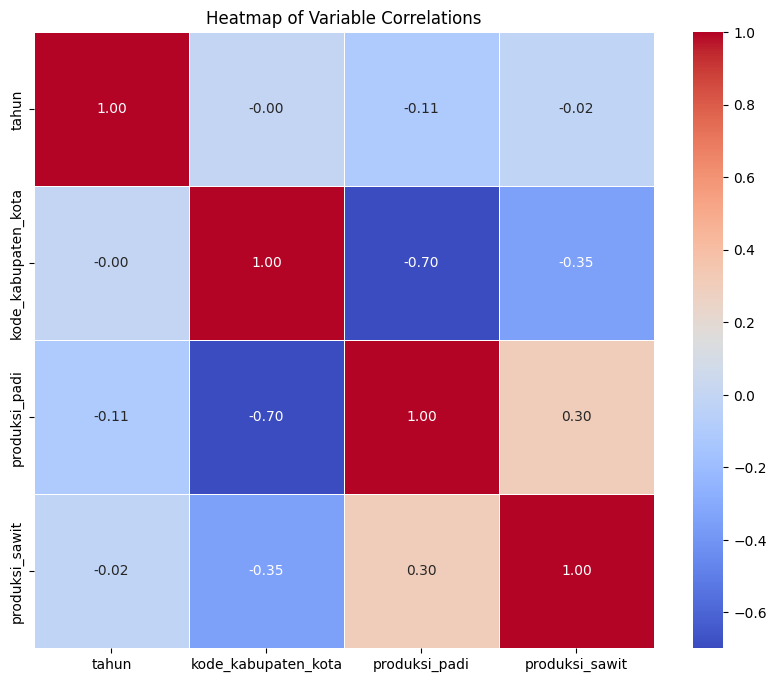

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Correlation using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Variable Correlations')
plt.show()

*The correlation between rice production and palm oil production with a value of 0.3 indicates that there is a positive relationship, but the relationship is not very strong. This means that an increase or decrease in rice production does not directly or strongly predict an increase or decrease in palm oil production, and vice versa.*

# **6. Overall Summary**

*1. There is no data containing Null values and no duplicate data.*

*2. The "Tahun" data is uniform without skewness, indicating a consistent distribution. The production years range from 2016 to 2022 with a standard deviation of 2 years from the mean.*

*3. Rice production peaked in 2019, while palm oil production reached its highest point in 2018.*

*4. Rice production has a wide range of values and high outliers, while palm oil production has significant variation, the majority of values are 0 (low), and there is no IQR.*

*5. There are 27 districts/cities, and "KABUPATEN BOGOR" appears most frequently.*

*6. Data in the "satuan" column is consistent in tons.*

*7. The correlation between rice and palm oil production shows a weak positive relationship. Changes in rice production do not directly or strongly predict changes in palm oil production, and vice versa.*